# Machine Learning- Finall project
### Submitted by: **Linoy Valko Noam Koren**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.svm import LinearSVC
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

We divieded the data into X and Y. The shape of X is (5000,150,150,3) and the Y values are the labels (there are 8 of them)

In [ ]:
X, Y = tfds.as_numpy(tfds.load(
    'colorectal_histology',
    split='train',
    batch_size=-1,
    as_supervised=True,
))

print('X.shape =',X.shape)
print('np.unique(Y) =',np.unique(Y))

Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


X.shape = (5000, 150, 150, 3)
np.unique(Y) = [0 1 2 3 4 5 6 7]


64 images of the data (X). Their size is (16,16)

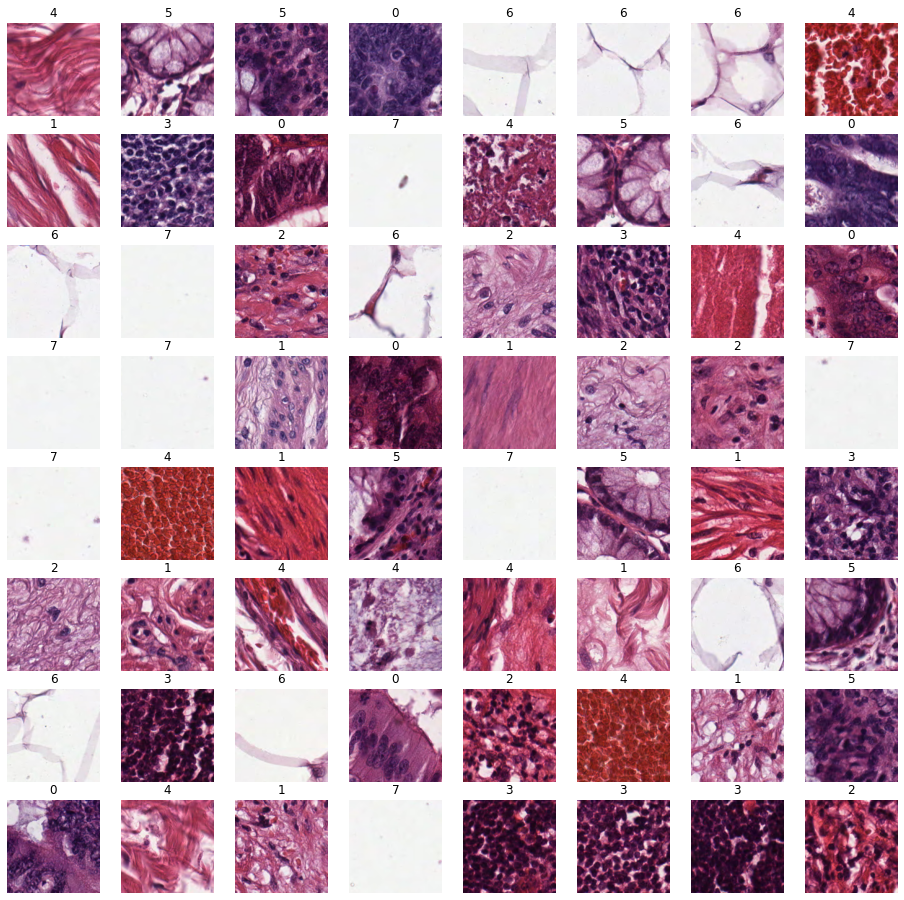

In [ ]:
plt.figure(figsize=(16,16))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(X[i], cmap='gray')
    plt.axis('off')
    plt.title(Y[i])

In [ ]:
class_names = ['Tumour epithelium', 'Simple stroma', 'Complex stroma','Immune cells','Debris','Normal mucosal glands','Adipose tissue','Background']

In the pre processing level we divided the data by 255 in order to get a float number between 0-1 because every pixel's range is between 0-255.

In [ ]:
X = X / 255

# **downsample image**

In the downsample image method we reshaped the size of the data (X) into (5000, 32, 32, 3).

In [ ]:
Z = tf.image.resize(X, [32,32]).numpy()
Z.shape

(5000, 32, 32, 3)

We split the data into train (90%) and test (10%) in order to test the performance of 3 classifications: SVM, softmax and neural network.

In [ ]:
Z_train = Z[:4500]
Y_train = Y[:4500]
Z_test = Z[4500:]
Y_test = Y[4500:]
Z_test.shape

(500, 32, 32, 3)

## **SVM**

We flatted the train into (4500, 3072) and the test into (500,3072) in order to test the SVM model and set the kernel to linear. 

In [ ]:
first_model1 = SVC(kernel = 'linear')
Z_train_flat = Z_train.reshape(4500,3072)
Z_test_flat = Z_test.reshape(500, 3072)
first_model1.fit(Z_train_flat, Y_train)
Z_train_flat.shape

(4500, 3072)

After applying the SVM model on the train, we calculated the accuracy of the train.

In [ ]:
# Calculate the accuracy of the train:
Y_hat1_train = first_model1.predict(Z_train_flat)

Accuracy_train1 = ((np.sum(Y_train == Y_hat1_train)) / Z_train_flat.shape[0])
print(Accuracy_train1)

0.9962222222222222


After applying the SVM model on the test data, we calculated the accuracy of the train.

In [ ]:
# Calculate the accuracy of the test:
Y_hat1_test = first_model1.predict(Z_test_flat)

Accuracy_test1 = ((np.sum(Y_test == Y_hat1_test)) / Z_test_flat.shape[0])
print(Accuracy_test1)

0.606


The results are: 

Accuracy_train1 = 0.996 

Accuracy_test1 = 0.606

#### **Confusion Matrix - SVM**

The confusion matrix presents the performance of the SVM classifier

Text(0.5, 1.0, 'Confusion Matrix')

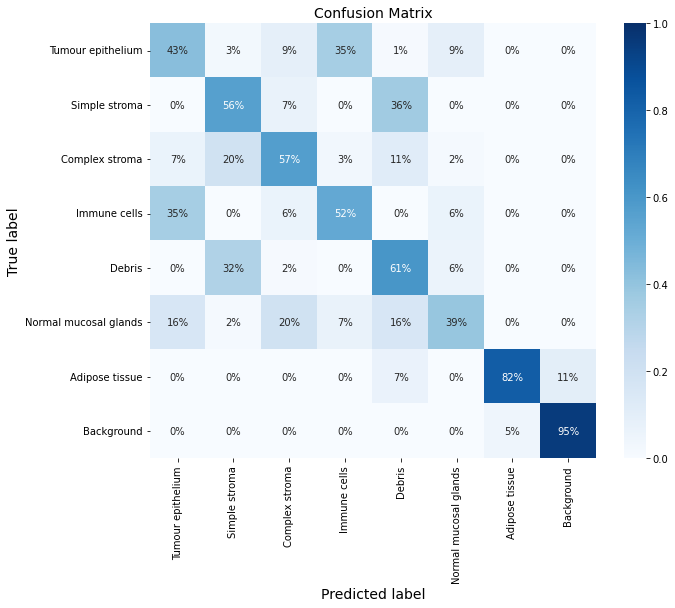

In [ ]:
CM1 = confusion_matrix(Y_test, Y_hat1_test, normalize='true')
plt.figure(figsize=(10,8))
heatmap(CM1,cmap='Blues',annot=True, fmt='.0%', vmin=0, vmax=1, 
        xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.title('Confusion Matrix',fontsize=14)

#### **TSNE SVM** 

The tSNE gragh presents the results in 2D before the calssification and after the dimension reduction.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


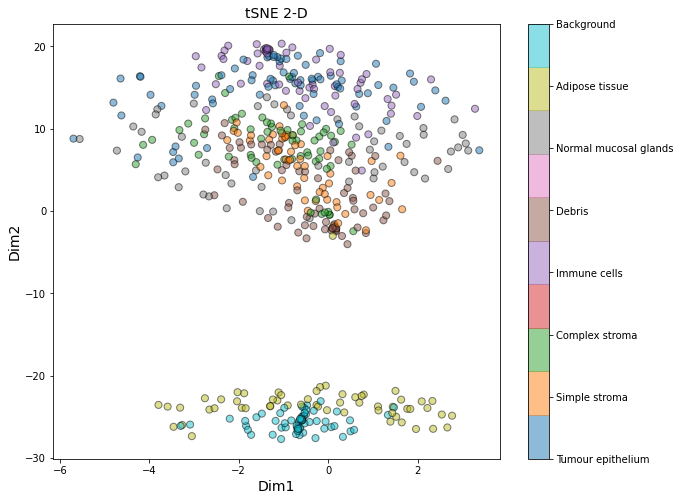

In [ ]:
X_2D = TSNE(n_components=2).fit_transform(Z_test_flat) 
plt.figure(figsize=(10,8))
Dim1 = X_2D[:,0]
Dim2 = X_2D[:,1]
h = plt.scatter(Dim1, Dim2, 50, Y_test, 
            cmap='tab10', alpha=0.5, edgecolors='k')

plt.xlabel('Dim1', fontsize=14)
plt.ylabel('Dim2', fontsize=14) 
plt.title('tSNE 2-D',fontsize=14)
cbar1 = plt.colorbar()
cbar1.ax.set_yticklabels(class_names)
plt.show()

## **Softmax classifier**

We applied the softmax classifier method on the train and test data. The shape of it is (32,32,3) and we set the epochs to 30 and verbose to 1.

In [ ]:
first_model2 = tf.keras.models.Sequential(name='first_model2')
first_model2.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))  
first_model2.add(tf.keras.layers.Dense(10,activation='softmax')) 

first_model2.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

first_model2.summary()

history = first_model2.fit(Z_train, Y_train, epochs=30, verbose=1, 
                        validation_data=(Z_test, Y_test))

Model: "first_model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
141/141 [==============================] - 3s 3ms/step - loss: 1.9904 - accuracy: 0.2642 - val_loss: 2.3134 - val_accuracy: 0.2720
Epoch 2/30
141/141 [==============================] - 0s 3ms/step - loss: 1.7758 - accuracy: 0.3204 - val_loss: 1.4727 - val_accuracy: 0.3580
Epoch 3/30
141/141 [==============================] - 0s 3ms/step - loss: 1.6372 - accuracy: 0.3758 - val_loss: 1.3423 - val_accuracy: 0.3720
Epoch 4/30
141/141 [

In [ ]:
# Calculate the accuracy of the train: 
Y_hat2_train = first_model2.predict(Z_train).argmax(axis=1)

Accuracy_train2 = ((np.sum(Y_train == Y_hat2_train)) / Z_train.shape[0])
print(Accuracy_train2)

0.6191111111111111


In [ ]:
# Calculate the accuracy of the test:
Y_hat2_test = first_model2.predict(Z_test).argmax(axis=1)

Accuracy_test2 = ((np.sum(Y_test == Y_hat2_test)) / Z_test.shape[0])
print(Accuracy_test2)

0.458


The results are:

Acuuracy_train2 = 0.6191111111111111

Acuuracy_test2 = 0.458

#### **Confusion Matrix- softmax**

The confusion matrix presents the performance of the softmax classifier

Text(0.5, 1.0, 'Confusion Matrix')

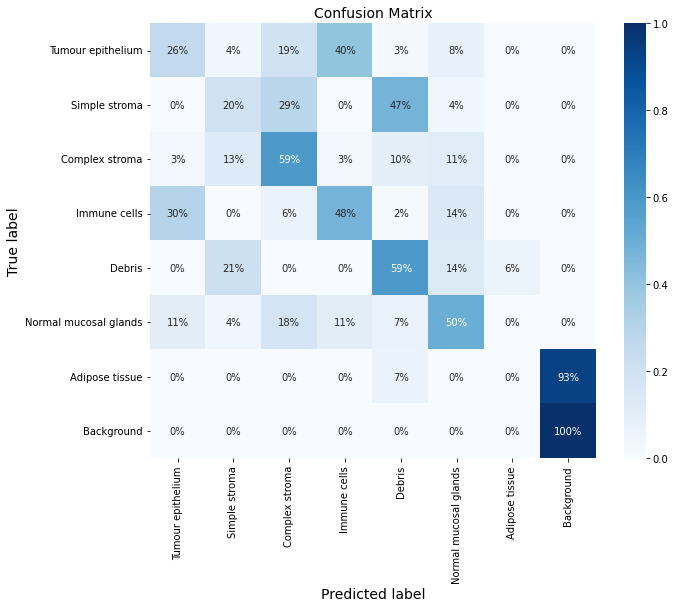

In [ ]:
CM2 = confusion_matrix(Y_test, Y_hat2_test, normalize='true')
plt.figure(figsize=(10,8))
heatmap(CM2,cmap='Blues',annot=True, fmt='.0%', vmin=0, vmax=1, 
        xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.title('Confusion Matrix',fontsize=14)

#### **TSNE** softmax

The tSNE gragh presents the results in 2D before the calssification and after the dimension reduction.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


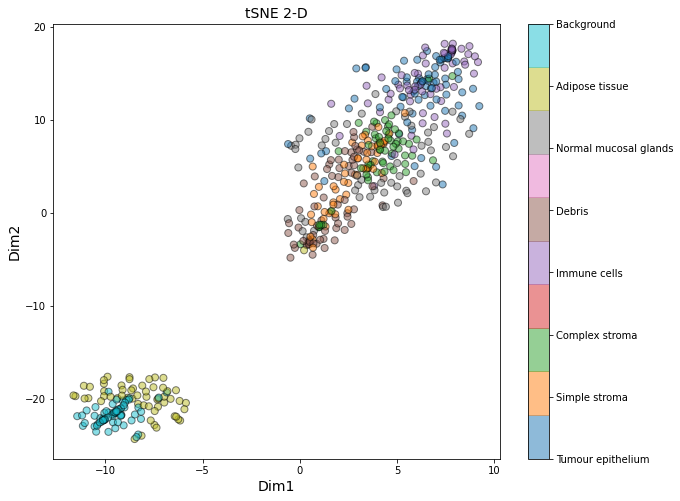

In [ ]:
X_2D = TSNE(n_components=2).fit_transform(Z_test_flat) 
plt.figure(figsize=(10,8))
Dim1 = X_2D[:,0]
Dim2 = X_2D[:,1]
h = plt.scatter(Dim1, Dim2, 50, Y_test, 
            cmap='tab10', alpha=0.5, edgecolors='k')

plt.xlabel('Dim1', fontsize=14)
plt.ylabel('Dim2', fontsize=14) 
plt.title('tSNE 2-D',fontsize=14)
cbar1 = plt.colorbar()
cbar1.ax.set_yticklabels(class_names)
plt.show()

## **Neural Network**

This classifier has 2 activation layers: 'relu' and 'softmax', then we fitted the model on the test and train with epochs=30 and verbose=1.

In [ ]:
first_model3 = tf.keras.models.Sequential(name='one_hidden_layer_model')
first_model3.add(tf.keras.layers.Dense(128, activation='relu', name= 'model3_Neural')) 
first_model3.add(tf.keras.layers.Dense(8, activation='softmax')) 

first_model3.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

first_model3_fitted = first_model3.fit(Z_train_flat, Y_train, epochs=30, verbose=1,
                          validation_data=(Z_test_flat, Y_test))


Epoch 1/30
141/141 [==============================] - 1s 4ms/step - loss: 1.7197 - accuracy: 0.2878 - val_loss: 1.6285 - val_accuracy: 0.2880
Epoch 2/30
141/141 [==============================] - 0s 3ms/step - loss: 1.4182 - accuracy: 0.3947 - val_loss: 1.3727 - val_accuracy: 0.4160
Epoch 3/30
141/141 [==============================] - 0s 3ms/step - loss: 1.2876 - accuracy: 0.4509 - val_loss: 1.2618 - val_accuracy: 0.4180
Epoch 4/30
141/141 [==============================] - 0s 3ms/step - loss: 1.2088 - accuracy: 0.4882 - val_loss: 1.2916 - val_accuracy: 0.4180
Epoch 5/30
141/141 [==============================] - 0s 3ms/step - loss: 1.1523 - accuracy: 0.5036 - val_loss: 1.2037 - val_accuracy: 0.4540
Epoch 6/30
141/141 [==============================] - 0s 3ms/step - loss: 1.1016 - accuracy: 0.5267 - val_loss: 1.1342 - val_accuracy: 0.4420
Epoch 7/30
141/141 [==============================] - 0s 3ms/step - loss: 1.0620 - accuracy: 0.5600 - val_loss: 1.2104 - val_accuracy: 0.4140
Epoch 

In [ ]:
# Calculate the accuracy of the train: 
Y_hat3_train = first_model3.predict(Z_train_flat).argmax(axis=1)

Accuracy_train3 = ((np.sum(Y_train == Y_hat3_train)) / Z_train_flat.shape[0])
print(Accuracy_train3)

0.7742222222222223


In [ ]:
# Calculate the accuracy of the test:
Y_hat3_test = first_model3.predict(Z_test_flat).argmax(axis=1)

Accuracy_test3 = ((np.sum(Y_test == Y_hat3_test)) / Z_test_flat.shape[0])
print(Accuracy_test3)

0.63


The results are:

Acuuracy_train2 = 0.7742222222222223

Acuuracy_test2 = 0.63

#### **Confusion Matrix- Neural**

Text(0.5, 1.0, 'Confusion Matrix')

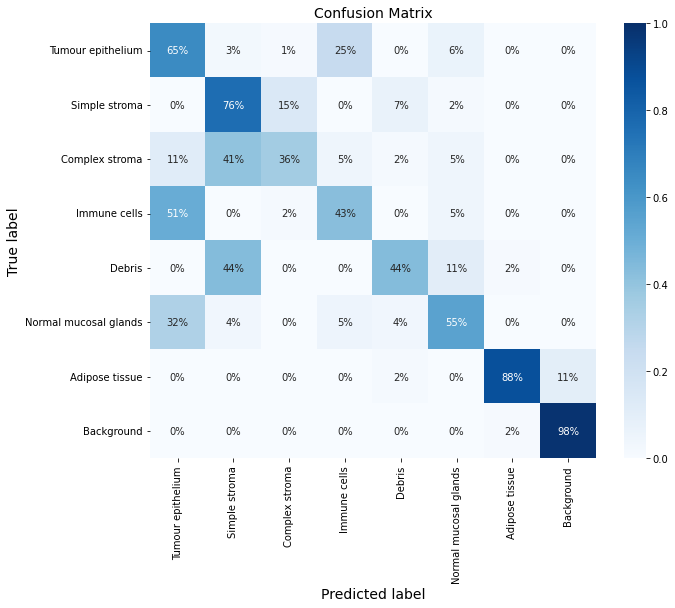

In [ ]:
CM3 = confusion_matrix(Y_test, Y_hat3_test, normalize='true')
plt.figure(figsize=(10,8))
heatmap(CM3,cmap='Blues',annot=True, fmt='.0%', vmin=0, vmax=1, 
        xticklabels=class_names, yticklabels= class_names)
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.title('Confusion Matrix',fontsize=14)

In [ ]:
m3 = Model(inputs= first_model3.input, outputs= first_model3.get_layer('model3_Neural').output)
X_downsample = m3.predict(Z_test_flat)

#### **TSNE- Neural**

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


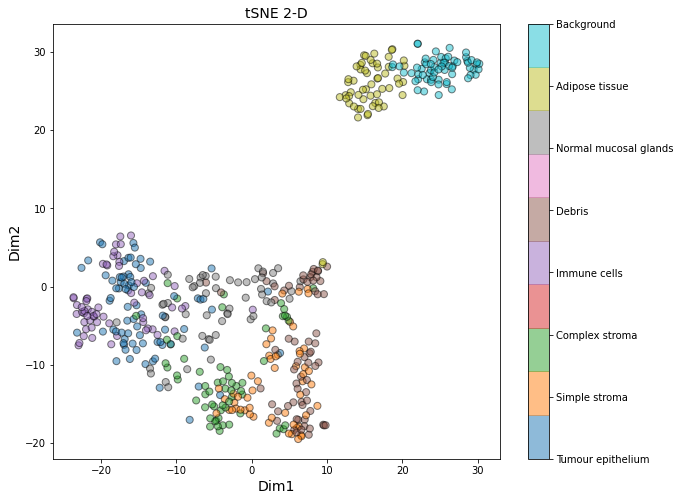

In [ ]:
X_2D = TSNE(n_components=2).fit_transform(X_downsample) 
plt.figure(figsize=(10,8))
Dim1 = X_2D[:,0]
Dim2 = X_2D[:,1]
h = plt.scatter(Dim1, Dim2, 50, Y_test, 
            cmap='tab10', alpha=0.5, edgecolors='k')

plt.xlabel('Dim1', fontsize=14)
plt.ylabel('Dim2', fontsize=14) 
plt.title('tSNE 2-D',fontsize=14)
cbar1 = plt.colorbar()
cbar1.ax.set_yticklabels(class_names)
plt.show()

# **PCA**

We reshaped the data into (5000, 67500)

In [ ]:
X1 = X.reshape(X.shape[0] ,X.shape[1] * X.shape[2] * X.shape[3])
X1.shape

(5000, 67500)

We applied the PCA method and then we got the data in 256-D 

In [ ]:
pca = PCA(n_components = 256)
pca.fit(X1)
print(X1.shape)
trans = pca.transform(X1)
trans.shape

(5000, 67500)


(5000, 256)

The total var after appling PCA is 91.5%

In [ ]:
tot_var = pca.explained_variance_ratio_.cumsum()
tot_var
# Total var: 91.5%

array([0.68218739, 0.70072498, 0.71228553, 0.72253853, 0.72938681,
       0.73595554, 0.74206899, 0.74626227, 0.75023791, 0.75414436,
       0.7579221 , 0.76113397, 0.76408089, 0.76692396, 0.7696291 ,
       0.77220728, 0.77463775, 0.77701861, 0.77934483, 0.78152023,
       0.78359614, 0.78564731, 0.78764532, 0.78955963, 0.79140981,
       0.79324921, 0.79506926, 0.7968096 , 0.79847892, 0.80011239,
       0.80172827, 0.80328348, 0.80480857, 0.80632563, 0.80772639,
       0.80912007, 0.81047047, 0.81179279, 0.81309523, 0.81437846,
       0.81563522, 0.81684753, 0.81801657, 0.81918033, 0.82031176,
       0.82143422, 0.82254645, 0.82362734, 0.8246963 , 0.82575075,
       0.82679319, 0.82782271, 0.82880148, 0.82977804, 0.83074567,
       0.83168658, 0.83261486, 0.83353039, 0.83443436, 0.83532576,
       0.83620978, 0.83707522, 0.83793137, 0.83877218, 0.83959211,
       0.84040654, 0.84121591, 0.84201672, 0.84280995, 0.84358988,
       0.8443654 , 0.84513532, 0.84588583, 0.84662587, 0.84735

## **SVM**

We split the data into train (4500, 256) and test (500,256).

In [ ]:
X_PCA_train = trans[:4500]
Y_PCA_train = Y[:4500]
X_PCA_test = trans[4500:]
Y_PCA_test = Y[4500:]
X_PCA_train.shape

(4500, 256)

We set the kernel to linear and fitted it on the data.

In [ ]:
second_model1 = SVC(kernel = 'linear')
second_model1.fit(X_PCA_train, Y_PCA_train)

SVC(kernel='linear')

In [ ]:
# Calculate the accuracy of the train:
Y_hat4_train = second_model1.predict(X_PCA_train)

Accuracy_train4 = ((np.sum(Y_PCA_train == Y_hat4_train)) / X_PCA_train.shape[0])
print(Accuracy_train4)

0.8888888888888888


In [ ]:
# Calculate the accuracy of the test:
Y_hat4_test = second_model1.predict(X_PCA_test)

Accuracy_test4 = ((np.sum(Y_PCA_test == Y_hat4_test)) / X_PCA_test.shape[0])
print(Accuracy_test4)

0.55


The results are:

Accuracy_train4 = 0.888

Accuracy_test4 = 0.55

#### **Confusion Matrix- SVM**

Text(0.5, 1.0, 'Confusion Matrix')

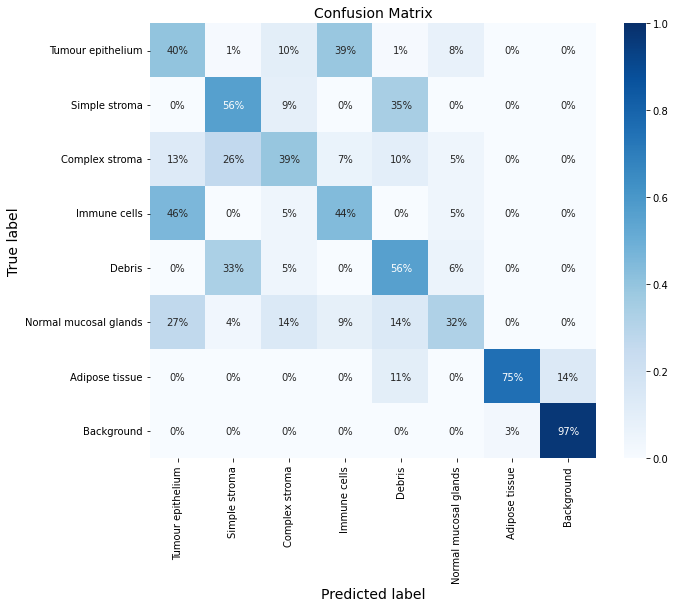

In [ ]:
CM4 = confusion_matrix(Y_PCA_test, Y_hat4_test, normalize='true')
plt.figure(figsize=(10,8))
heatmap(CM4,cmap='Blues',annot=True, fmt='.0%', vmin=0, vmax=1, 
        xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.title('Confusion Matrix',fontsize=14)

#### **TSNE SVM**

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


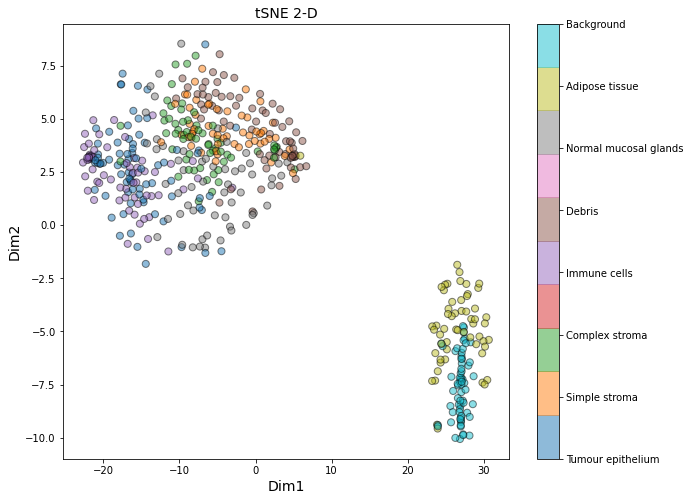

In [ ]:
X_2D = TSNE(n_components=2).fit_transform(X_PCA_test) 
plt.figure(figsize=(10,8))
Dim1 = X_2D[:,0]
Dim2 = X_2D[:,1]
h = plt.scatter(Dim1, Dim2, 50, Y_PCA_test, 
            cmap='tab10', alpha=0.5, edgecolors='k')

plt.xlabel('Dim1', fontsize=14)
plt.ylabel('Dim2', fontsize=14) 
plt.title('tSNE 2-D',fontsize=14)
cbar1 = plt.colorbar()
cbar1.ax.set_yticklabels(class_names)
plt.show()

## **Softmax classifier**

We applied the softmax classifier method on the train and test data. We set the epochs to 30 and verbose to 1.

In [ ]:
second_model2 = tf.keras.models.Sequential(name='second_model2')
second_model2.add(tf.keras.layers.Dense(10,activation='softmax')) 

second_model2.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = second_model2.fit(X_PCA_train, Y_PCA_train, epochs=30, verbose=1, 
                        validation_data=(X_PCA_test, Y_PCA_test))

Epoch 1/30
141/141 [==============================] - 1s 3ms/step - loss: 4.1299 - accuracy: 0.3629 - val_loss: 6.0795 - val_accuracy: 0.3980
Epoch 2/30
141/141 [==============================] - 0s 2ms/step - loss: 3.3606 - accuracy: 0.4278 - val_loss: 2.6448 - val_accuracy: 0.4660
Epoch 3/30
141/141 [==============================] - 0s 3ms/step - loss: 2.9570 - accuracy: 0.4733 - val_loss: 4.2304 - val_accuracy: 0.4560
Epoch 4/30
141/141 [==============================] - 0s 3ms/step - loss: 2.9559 - accuracy: 0.4769 - val_loss: 3.5845 - val_accuracy: 0.4420
Epoch 5/30
141/141 [==============================] - 0s 3ms/step - loss: 2.7062 - accuracy: 0.4969 - val_loss: 4.3411 - val_accuracy: 0.4360
Epoch 6/30
141/141 [==============================] - 0s 3ms/step - loss: 2.8203 - accuracy: 0.5004 - val_loss: 4.1927 - val_accuracy: 0.4420
Epoch 7/30
141/141 [==============================] - 0s 3ms/step - loss: 2.7960 - accuracy: 0.5102 - val_loss: 2.8862 - val_accuracy: 0.4540
Epoch 

In [ ]:
# Calculate the accuracy of the train:
Y_hat5_train = second_model2.predict(X_PCA_train).argmax(axis=1)

Accuracy_train5 = ((np.sum(Y_PCA_train == Y_hat5_train)) / X_PCA_train.shape[0])
print(Accuracy_train5)

0.5891111111111111


In [ ]:
# Calculate the accuracy of the test:
Y_hat5_test = second_model2.predict(X_PCA_test).argmax(axis=1)

Accuracy_test5 = ((np.sum(Y_PCA_test == Y_hat5_test)) / X_PCA_test.shape[0])
print(Accuracy_test5)

0.458


The resuls are:

Accuracy_train5 = 0.5891111111111111

Accuracy_test5 = 0.458

#### **Confusion Matrix- softmax**

Text(0.5, 1.0, 'Confusion Matrix')

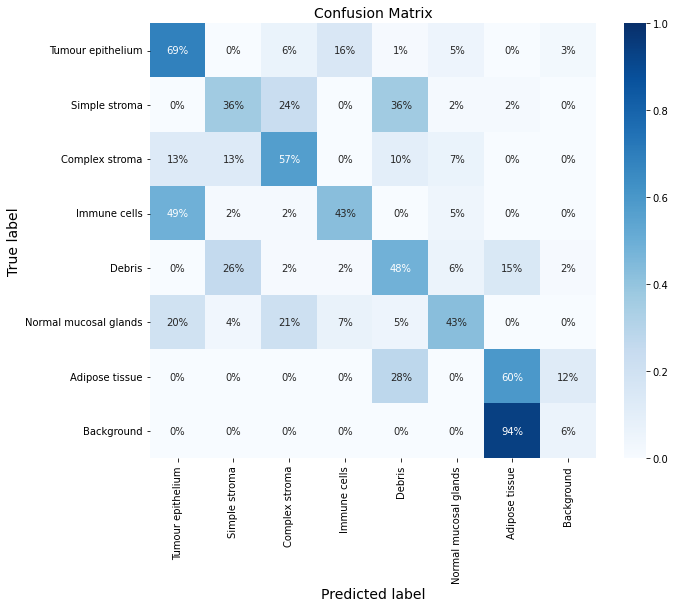

In [ ]:
CM5 = confusion_matrix(Y_PCA_test, Y_hat5_test, normalize='true')
plt.figure(figsize=(10,8))
heatmap(CM5,cmap='Blues',annot=True, fmt='.0%', vmin=0, vmax=1, 
        xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.title('Confusion Matrix',fontsize=14)

#### **TSNE- softmax**

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


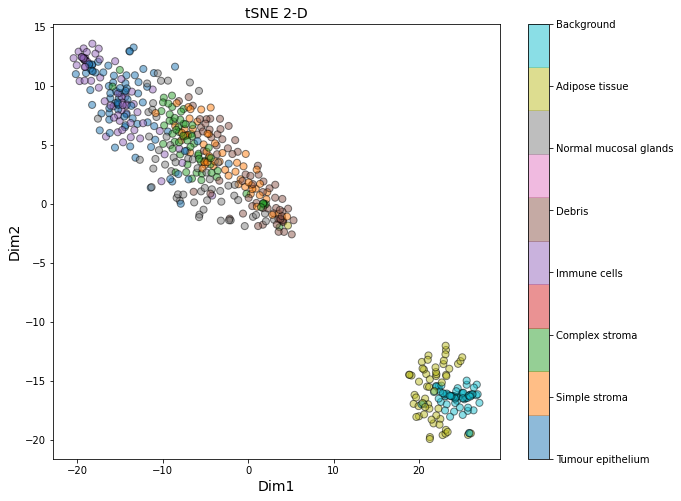

In [ ]:
X_2D = TSNE(n_components=2).fit_transform(X_PCA_test) 
plt.figure(figsize=(10,8))
Dim1 = X_2D[:,0]
Dim2 = X_2D[:,1]
h = plt.scatter(Dim1, Dim2, 50, Y_PCA_test, 
            cmap='tab10', alpha=0.5, edgecolors='k')

plt.xlabel('Dim1', fontsize=14)
plt.ylabel('Dim2', fontsize=14) 
plt.title('tSNE 2-D',fontsize=14)
cbar1 = plt.colorbar()
cbar1.ax.set_yticklabels(class_names)
plt.show()

## **Neural Network**

This classifier has 2 activation layers: 'relu' and 'softmax', then we fitted the model on the test and train with epochs=30 and verbose=1.

In [ ]:
second_model3 = tf.keras.models.Sequential(name='one_hidden_layer_model')
second_model3.add(tf.keras.layers.Dense(128, activation='relu', name= 'model6_Neural')) 
second_model3.add(tf.keras.layers.Dense(8, activation='softmax')) 

second_model3.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

second_model3_fitted = second_model3.fit(X_PCA_train, Y_PCA_train, epochs=30, verbose=1,
                         validation_data=(X_PCA_test, Y_PCA_test))

Epoch 1/30
141/141 [==============================] - 1s 3ms/step - loss: 2.1125 - accuracy: 0.4262 - val_loss: 1.2534 - val_accuracy: 0.4640
Epoch 2/30
141/141 [==============================] - 0s 3ms/step - loss: 1.0831 - accuracy: 0.5596 - val_loss: 1.0718 - val_accuracy: 0.5900
Epoch 3/30
141/141 [==============================] - 0s 3ms/step - loss: 0.8731 - accuracy: 0.6467 - val_loss: 1.0420 - val_accuracy: 0.6200
Epoch 4/30
141/141 [==============================] - 0s 3ms/step - loss: 0.7741 - accuracy: 0.6802 - val_loss: 1.0110 - val_accuracy: 0.5840
Epoch 5/30
141/141 [==============================] - 0s 3ms/step - loss: 0.7037 - accuracy: 0.7138 - val_loss: 0.9722 - val_accuracy: 0.6200
Epoch 6/30
141/141 [==============================] - 0s 3ms/step - loss: 0.6486 - accuracy: 0.7362 - val_loss: 1.2053 - val_accuracy: 0.6180
Epoch 7/30
141/141 [==============================] - 0s 3ms/step - loss: 0.6120 - accuracy: 0.7567 - val_loss: 1.0270 - val_accuracy: 0.5160
Epoch 

In [ ]:
# Calculate the accuracy of the train: 
Y_hat6_train = second_model3.predict(X_PCA_train).argmax(axis=1)

Accuracy_train6 = ((np.sum(Y_PCA_train == Y_hat6_train)) / X_PCA_train.shape[0])
print(Accuracy_train6)

0.9693333333333334


In [ ]:
# Calculate the accuracy of the test:
Y_hat6_test = second_model3.predict(X_PCA_test).argmax(axis=1)

Accuracy_test6 = ((np.sum(Y_PCA_test == Y_hat6_test)) / X_PCA_test.shape[0])
print(Accuracy_test6)

0.66


The results are:

Acuuracy_train6 = 0.9693333333333334

Acuuracy_test6 = 0.66

#### **Confusion Matrix- Neural**

Text(0.5, 1.0, 'Confusion Matrix')

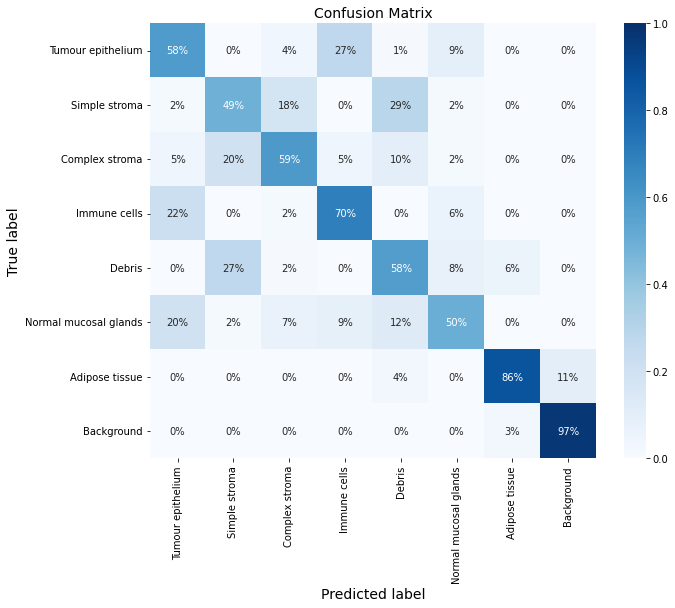

In [ ]:
CM6 = confusion_matrix(Y_PCA_test, Y_hat6_test, normalize='true')
plt.figure(figsize=(10,8))
heatmap(CM6,cmap='Blues',annot=True, fmt='.0%', vmin=0, vmax=1, 
        xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.title('Confusion Matrix',fontsize=14)

In [ ]:
m6 = Model(inputs= second_model3.input, outputs= second_model3.get_layer('model6_Neural').output)
X_PCA = m6.predict(X_PCA_test)

#### **TSNE- Neural**

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


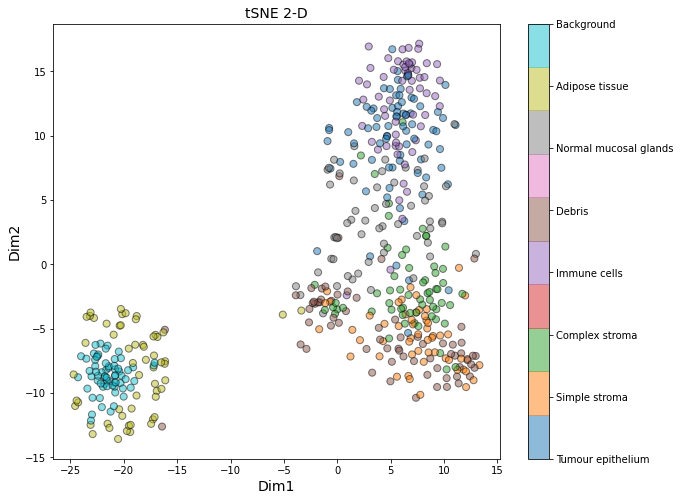

In [ ]:
X_2D = TSNE(n_components=2).fit_transform(X_PCA) 
plt.figure(figsize=(10,8))
Dim1 = X_2D[:,0]
Dim2 = X_2D[:,1]
h = plt.scatter(Dim1, Dim2, 50, Y_PCA_test, 
            cmap='tab10', alpha=0.5, edgecolors='k')

plt.xlabel('Dim1', fontsize=14)
plt.ylabel('Dim2', fontsize=14) 
plt.title('tSNE 2-D',fontsize=14)
cbar1 = plt.colorbar()
cbar1.ax.set_yticklabels(class_names)
plt.show()

# **VGG 16**

We used the vgg 16 modle, the input size is (150,150,3), then we flatted the data to (4, 4, 512) and finally to (8192).

In [ ]:
VGG_model = Sequential()

VGG_model.add(VGG16(include_top=False, input_shape=(150,150,3)))
VGG_model.add(Flatten(name='my_flaten'))
VGG_model.layers[0].trainable = False
VGG_model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 my_flaten (Flatten)         (None, 8192)              0         
                                                                 
Total params: 14,714,688
Trainable params: 0
Non-trainable params: 14,714,688
_________________________________________________________________


We fitted the modle with epoch 1 because the run time was very slow and did not improved and set verbose to 1. Also the batch_size (the number of samples) is 64.

In [ ]:
VGG_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

h = VGG_model.fit(X[:4500], Y[:4500], epochs=1, batch_size=64, verbose=1,
              validation_data = (X[4500:], Y[4500:]))

71/71 [==============================] - 27s 219ms/step - loss: 18.3485 - accuracy: 0.0000e+00 - val_loss: 17.9802 - val_accuracy: 0.0000e+00


In [ ]:
m2 = Model(inputs= VGG_model.input, outputs= VGG_model.get_layer('my_flaten').output)
X_VGG = m2.predict(X)

We divided the data into train (4500, 8192) and test (500,8192).

In [ ]:
print(X_VGG.shape)
X_VGG_train = X_VGG[:4500]
X_VGG_test = X_VGG[4500:]
X_VGG_train.shape

(5000, 8192)


(4500, 8192)

## **SVM**

We set the kernel to linear and fitted it on the data.

In [ ]:
third_model1 = SVC(C= 1, kernel = 'linear')
third_model1.fit(X_VGG_train, Y_train)

SVC(C=1, kernel='linear')

In [ ]:
# Calculate the accuracy of the train:
Y_hat7_train = third_model1.predict(X_VGG_train)

Accuracy_train7 = ((np.sum(Y_train == Y_hat7_train)) / X_VGG_train.shape[0])
print(Accuracy_train7)

0.9993333333333333


In [ ]:
# Calculate the accuracy of the test:
Y_hat7_test = third_model1.predict(X_VGG_test)

Accuracy_test7 = ((np.sum(Y_test == Y_hat7_test)) / X_VGG_test.shape[0])
print(Accuracy_test7)

0.902


The results are:

Accuracy_train7 = 0.999333333333

Accuracy_test7 = 0.902

#### **Confusion Matrix- SVM**

Text(0.5, 1.0, 'Confusion Matrix')

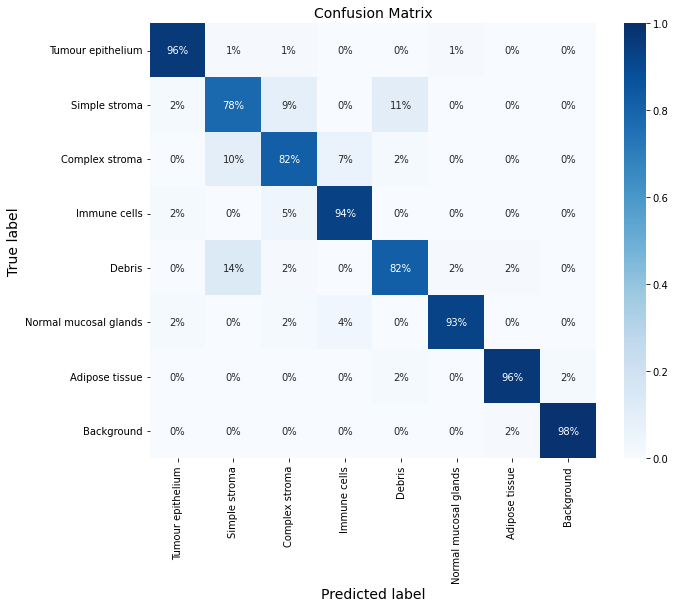

In [ ]:
CM7 = confusion_matrix(Y_test, Y_hat7_test, normalize='true')
plt.figure(figsize=(10,8))
heatmap(CM7,cmap='Blues',annot=True, fmt='.0%', vmin=0, vmax=1, 
        xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.title('Confusion Matrix',fontsize=14)

#### **TSNE-SVM**


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


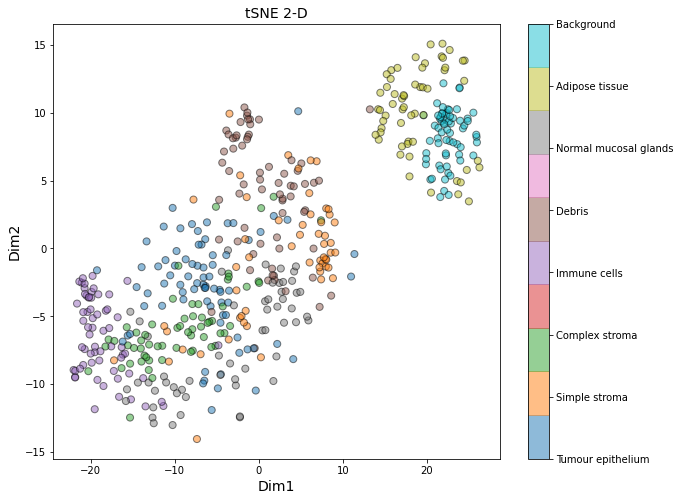

In [ ]:
X_2D = TSNE(n_components=2).fit_transform(X_VGG_test) 
plt.figure(figsize=(10,8))
Dim1 = X_2D[:,0]
Dim2 = X_2D[:,1]
h = plt.scatter(Dim1, Dim2, 50, Y_test, 
            cmap='tab10', alpha=0.5, edgecolors='k')

plt.xlabel('Dim1', fontsize=14)
plt.ylabel('Dim2', fontsize=14) 
plt.title('tSNE 2-D',fontsize=14)
cbar1 = plt.colorbar()
cbar1.ax.set_yticklabels(class_names)
plt.show()

## **Softmax classifier**

We applied the softmax classifier method on the train and test data. We set the epochs to 30 and verbose to 1.

In [ ]:
third_model2 = tf.keras.models.Sequential(name='third_model2')
third_model2.add(tf.keras.layers.Dense(10,activation='softmax')) 

third_model2.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = third_model2.fit(X_VGG_train, Y_train, epochs=25, verbose=1, 
                        validation_data=(X_VGG_test, Y_test))

Epoch 1/25
141/141 [==============================] - 1s 4ms/step - loss: 1.8662 - accuracy: 0.5198 - val_loss: 0.6853 - val_accuracy: 0.7600
Epoch 2/25
141/141 [==============================] - 0s 3ms/step - loss: 0.7817 - accuracy: 0.7380 - val_loss: 0.7189 - val_accuracy: 0.7580
Epoch 3/25
141/141 [==============================] - 1s 5ms/step - loss: 0.6363 - accuracy: 0.7813 - val_loss: 0.5364 - val_accuracy: 0.7960
Epoch 4/25
141/141 [==============================] - 1s 5ms/step - loss: 0.5509 - accuracy: 0.8136 - val_loss: 0.5888 - val_accuracy: 0.7760
Epoch 5/25
141/141 [==============================] - 1s 7ms/step - loss: 0.4887 - accuracy: 0.8267 - val_loss: 0.4708 - val_accuracy: 0.8280
Epoch 6/25
141/141 [==============================] - 1s 5ms/step - loss: 0.4554 - accuracy: 0.8424 - val_loss: 0.5568 - val_accuracy: 0.7960
Epoch 7/25
141/141 [==============================] - 0s 3ms/step - loss: 0.4350 - accuracy: 0.8536 - val_loss: 0.4425 - val_accuracy: 0.8340
Epoch 

In [ ]:
# Calculate the accuracy of the train:
Y_hat8_train = third_model2.predict(X_VGG_train).argmax(axis=1)

Accuracy_train8 = ((np.sum(Y_train == Y_hat8_train)) / X_VGG_train.shape[0])
print(Accuracy_train8)

0.9382222222222222


In [ ]:
# Calculate the accuracy of the test:
Y_hat8_test = third_model2.predict(X_VGG_test).argmax(axis=1)

Accuracy_test8 = ((np.sum(Y_test == Y_hat8_test)) / X_VGG_test.shape[0])
print(Accuracy_test8)

0.854


The results are: 

Acuuracy_train8 = 0.9382222222222222

Acuuracy_test8 = 0.854

#### **Confusion Matrix- softmax** 

Text(0.5, 1.0, 'Confusion Matrix')

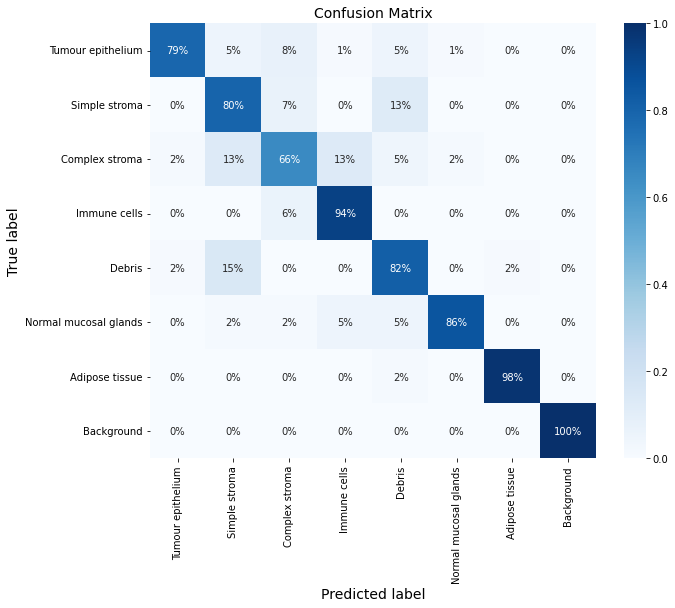

In [ ]:
CM8 = confusion_matrix(Y_test, Y_hat8_test, normalize='true')
plt.figure(figsize=(10,8))
heatmap(CM8,cmap='Blues',annot=True, fmt='.0%', vmin=0, vmax=1, 
        xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.title('Confusion Matrix',fontsize=14)

#### **TSNE- softmax**

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


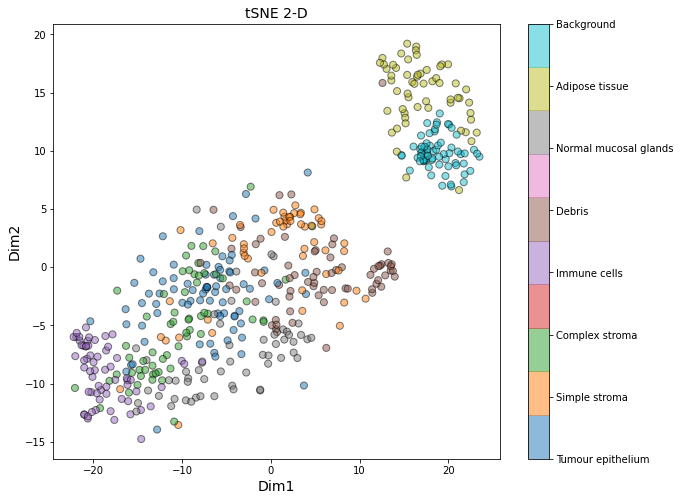

In [ ]:
X_2D = TSNE(n_components=2).fit_transform(X_VGG_test) 
plt.figure(figsize=(10,8))
Dim1 = X_2D[:,0]
Dim2 = X_2D[:,1]
h = plt.scatter(Dim1, Dim2, 50, Y_test, 
            cmap='tab10', alpha=0.5, edgecolors='k')

plt.xlabel('Dim1', fontsize=14)
plt.ylabel('Dim2', fontsize=14) 
plt.title('tSNE 2-D',fontsize=14)
cbar1 = plt.colorbar()
cbar1.ax.set_yticklabels(class_names)
plt.show()

## **Neural Network**

This classifier has 2 activation layers: 'relu' and 'softmax', then we fitted the model on the test and train with epochs=30 and verbose=1.

In [ ]:
third_model3 = tf.keras.models.Sequential(name='one_hidden_layer_model')
third_model3.add(tf.keras.layers.Dense(128, activation='relu', name= 'model9_Neural')) 
third_model3.add(tf.keras.layers.Dense(8, activation='softmax')) 

third_model3.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

third_model3_fitted = third_model3.fit(X_VGG_train, Y_train, epochs=30, verbose=1,
                         validation_data=(X_VGG_test, Y_test))

Epoch 1/30
141/141 [==============================] - 1s 4ms/step - loss: 1.2920 - accuracy: 0.5342 - val_loss: 1.1236 - val_accuracy: 0.5840
Epoch 2/30
141/141 [==============================] - 1s 4ms/step - loss: 0.7698 - accuracy: 0.7318 - val_loss: 0.5784 - val_accuracy: 0.8000
Epoch 3/30
141/141 [==============================] - 0s 3ms/step - loss: 0.6022 - accuracy: 0.7889 - val_loss: 0.5650 - val_accuracy: 0.8080
Epoch 4/30
141/141 [==============================] - 1s 4ms/step - loss: 0.5428 - accuracy: 0.8073 - val_loss: 0.5668 - val_accuracy: 0.7880
Epoch 5/30
141/141 [==============================] - 1s 4ms/step - loss: 0.4886 - accuracy: 0.8307 - val_loss: 0.4065 - val_accuracy: 0.8520
Epoch 6/30
141/141 [==============================] - 0s 3ms/step - loss: 0.4617 - accuracy: 0.8378 - val_loss: 0.4521 - val_accuracy: 0.8320
Epoch 7/30
141/141 [==============================] - 0s 3ms/step - loss: 0.4297 - accuracy: 0.8464 - val_loss: 0.4081 - val_accuracy: 0.8520
Epoch 

In [ ]:
# Calculate the accuracy of the train:
Y_hat9_train = third_model3.predict(X_VGG_train).argmax(axis=1)

Accuracy_train9 = ((np.sum(Y_train == Y_hat9_train)) / X_VGG_train.shape[0])
print(Accuracy_train9)

0.936


In [ ]:
# Calculate the accuracy of the test:
Y_hat9_test = third_model3.predict(X_VGG_test).argmax(axis=1)

Accuracy_test9 = ((np.sum(Y_test == Y_hat9_test)) / X_VGG_test.shape[0])
print(Accuracy_test9)

0.87


The results are:

Acuuracy_train9 = 0.936

Acuuracy_test9 = 0.87

#### **Confusion Matrix- Neural**

Text(0.5, 1.0, 'Confusion Matrix')

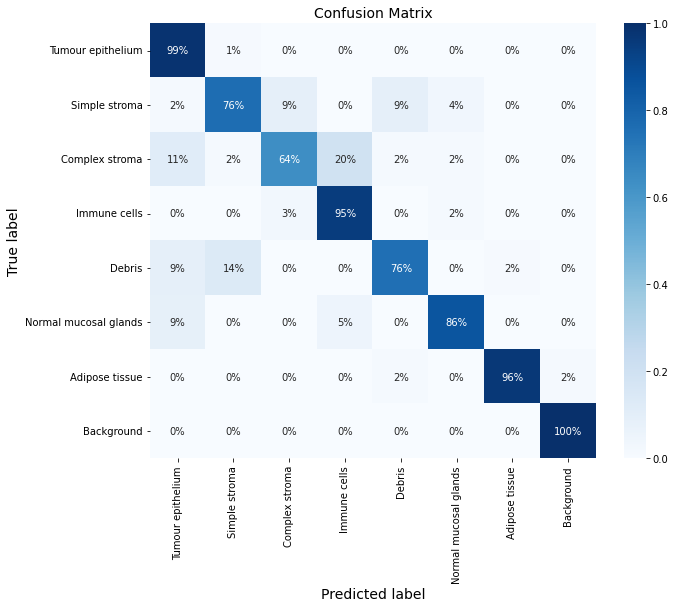

In [ ]:
CM9 = confusion_matrix(Y_test, Y_hat9_test, normalize='true')
plt.figure(figsize=(10,8))
heatmap(CM9, cmap='Blues',annot=True, fmt='.0%', vmin=0, vmax=1, 
        xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.title('Confusion Matrix',fontsize=14)

In [ ]:
m9 = Model(inputs= third_model3.input, outputs= third_model3.get_layer('model9_Neural').output)
X_VGG = m9.predict(X_VGG_test)

#### **TSNE- Neural**

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


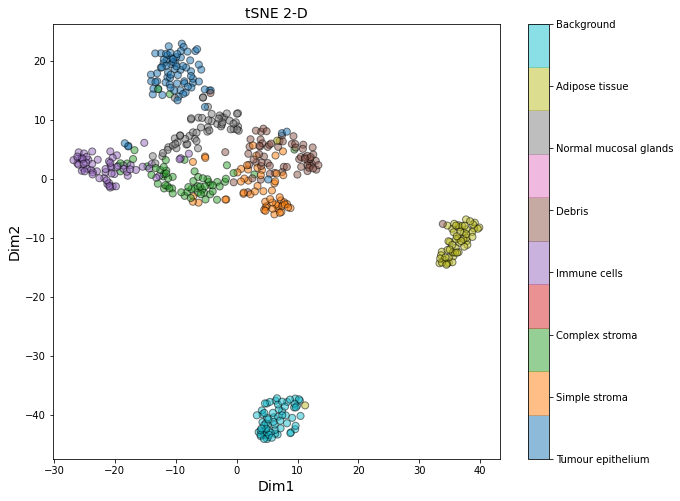

In [ ]:
X_2D = TSNE(n_components=2).fit_transform(X_VGG) 
plt.figure(figsize=(10,8))
Dim1 = X_2D[:,0]
Dim2 = X_2D[:,1]
h = plt.scatter(Dim1, Dim2, 50, Y_test, 
            cmap='tab10', alpha=0.5, edgecolors='k')

plt.xlabel('Dim1', fontsize=14)
plt.ylabel('Dim2', fontsize=14) 
plt.title('tSNE 2-D',fontsize=14)
cbar1 = plt.colorbar()
cbar1.ax.set_yticklabels(class_names)
plt.show()

# **Results in table of the all models:**

<table>
  <tr>
    <th>Dimensionality reduction</th>
    <th>Classification</th>
    <th>train accuracy (%)</th>
    <th>test accuracy (%)</th>
  </tr>
    
  <tr> 
    <td>Downsample image</td>   <!-- Dataset -->  
    <td>SVM</td>   <!-- Model -->
    <td> 0.996 </td> <!-- train accuracy -->
    <td> 0.606 </td> <!-- test accuracy -->
  </tr>

  <tr> 
    <td>Downsample image</td>   <!-- Dataset -->  
    <td>Softmax classifier</td>   <!-- Model -->
    <td> 0.708 </td> <!-- train accuracy -->
    <td> 0.55 </td> <!-- test accuracy -->
  </tr>

  <tr> 
    <td>Downsample image</td>   <!-- Dataset -->  
    <td>Neural Network</td>   <!-- Model -->
    <td> 0.616 </td> <!-- train accuracy -->
    <td> 0.508 </td> <!-- test accuracy -->
  </tr>

  <tr> 
    <td>PCA</td>   <!-- Dataset -->  
    <td>SVM</td>   <!-- Model -->
    <td> 0.888 </td> <!-- train accuracy -->
    <td> 0.55 </td> <!-- test accuracy -->
  </tr>

  <tr> 
    <td>PCA</td>   <!-- Dataset -->  
    <td>Softmax classifier</td>   <!-- Model -->
    <td> 0.589 </td> <!-- train accuracy -->
    <td> 0.458 </td> <!-- test accuracy -->
  </tr>

  <tr> 
    <td>PCA</td>   <!-- Dataset -->  
    <td>Neural Network</td>   <!-- Model -->
    <td> 0.969 </td> <!-- train accuracy -->
    <td> 0.66 </td> <!-- test accuracy -->
  </tr>

  <tr> 
    <td>VGG</td>   <!-- Dataset -->  
    <td>SVM</td>   <!-- Model -->
    <td> 0.999 </td> <!-- train accuracy -->
    <td> 0.902 </td> <!-- test accuracy -->
  </tr>

  <tr> 
    <td>VGG</td>   <!-- Dataset -->  
    <td>Softmax classifier</td>   <!-- Model -->
    <td> 0.938 </td> <!-- train accuracy -->
    <td> 0.854 </td> <!-- test accuracy -->
  </tr>

  <tr> 
    <td>VGG</td>   <!-- Dataset -->  
    <td>Neural Network</td>   <!-- Model -->
    <td> 0.936 </td> <!-- train accuracy -->
    <td> 0.87 </td> <!-- test accuracy -->
  </tr>

</table>


---

# **Results in bar plot**

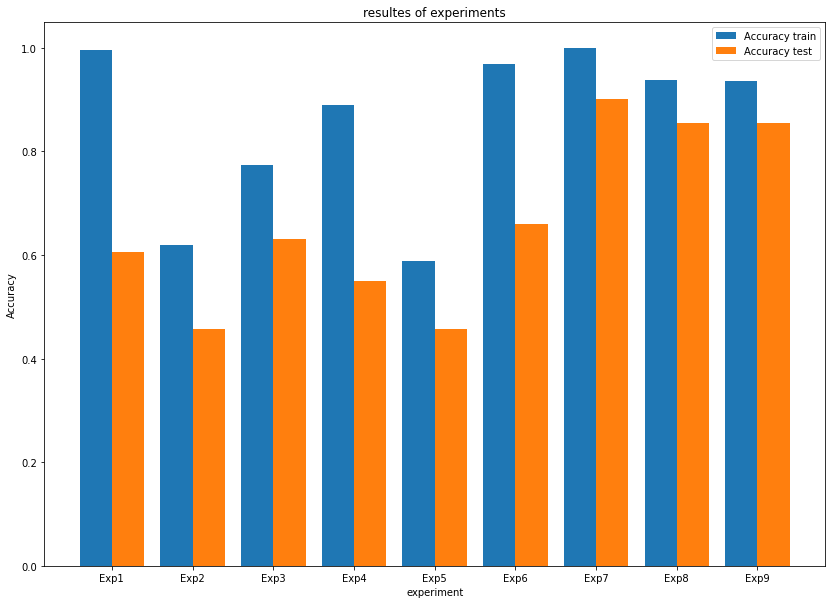

In [ ]:
exp_names = ['Exp1','Exp2','Exp3','Exp4','Exp5','Exp6','Exp7','Exp8','Exp9'] 
accuracy_train = [Accuracy_train1, Accuracy_train2, Accuracy_train3, Accuracy_train4, Accuracy_train5, Accuracy_train6, Accuracy_train7, Accuracy_train8, Accuracy_train9]
accuracy_test = [Accuracy_test1, Accuracy_test2, Accuracy_test3, Accuracy_test4, Accuracy_test5, Accuracy_test6, Accuracy_test7, Accuracy_test8, Accuracy_test8]
plt.figure(figsize = (14,10))
X_axis = np.arange(len(exp_names))
plt.bar(X_axis - 0.2, accuracy_train, 0.4, label = 'Accuracy train') 
plt.bar(X_axis + 0.2, accuracy_test, 0.4, label = 'Accuracy test') 
plt.xticks(X_axis, exp_names) 
plt.xlabel('experiment') 
plt.ylabel('Accuracy') 
plt.title('resultes of experiments') 
plt.legend() 
plt.show() 